In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random
import numpy as np

# Load data


In [46]:
Y_train = np.loadtxt('/labels.csv', delimiter=',')
X_test = np.loadtxt('/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/labels_test.csv', delimiter=',')
X_train = np.loadtxt('/input.csv',delimiter=',')

In [47]:
print("shape of X_train = ", X_train.shape)
print("shape of Y_train = ", Y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of Y_test = ", Y_test.shape)
print(len(X_train))

shape of X_train =  (2000, 30000)
shape of Y_train =  (2000,)
shape of X_test =  (400, 30000)
shape of Y_test =  (400,)
2000


In [48]:
#reshape into appropriate images sizes
X_train=X_train.reshape(len(X_train),100, 100, 3) #100px*100px* 3(RGB)
Y_train = Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100, 100, 3) #100px*100px* 3(RGB)
Y_test = Y_test.reshape(len(Y_test),1)

In [49]:
print("shape of X_train = ", X_train.shape)
print("shape of Y_train = ", Y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of Y_test = ", Y_test.shape)

shape of X_train =  (2000, 100, 100, 3)
shape of Y_train =  (2000, 1)
shape of X_test =  (400, 100, 100, 3)
shape of Y_test =  (400, 1)


In [50]:
X_train[1,:] # 0 to 255 values which is RGB

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [51]:
#To train our model appropriately we need to rescale values between 0 to 1
X_train= X_train/255.0
X_test = X_test/255.0

In [52]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

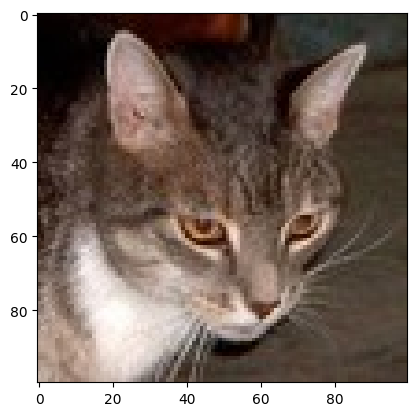

In [58]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

In [61]:
# squential ~ stacking up layers
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
                    MaxPooling2D((2,2)),
                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D((2,2)),

                    Flatten(),

                    Dense(64, activation='relu'),
                    Dense(1,activation='sigmoid' ) #last layer need same no. of neuron as o/p class
                    #using sigmoid because its binary classifications right manavi ? :)
                    ])

another way to write the model

In [62]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

time to add cost function and back propagation

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

training

In [66]:
model.fit(X_train,Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 23s 703ms/step - loss: 0.2163 - accuracy: 0.9190
Epoch 2/5
32/32 [==============================] - 23s 710ms/step - loss: 0.1887 - accuracy: 0.9315
Epoch 3/5
32/32 [==============================] - 21s 658ms/step - loss: 0.1359 - accuracy: 0.9605
Epoch 4/5
32/32 [==============================] - 23s 725ms/step - loss: 0.1144 - accuracy: 0.9685
Epoch 5/5
32/32 [==============================] - 22s 686ms/step - loss: 0.0893 - accuracy: 0.9790


evaluate performance on test dataset

In [68]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 119ms/step - loss: 0.9610 - accuracy: 0.7100


[0.9609668254852295, 0.7099999785423279]

#Making predictions for images

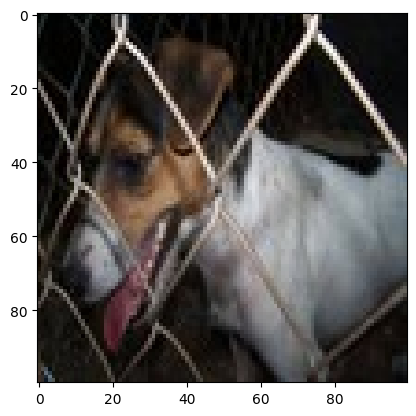

1/1 [==============================] - 0s 33ms/step
Our model says : It is Dog


In [75]:
idx1= random.randint(0, len(Y_test))
plt.imshow(X_test[idx1])
plt.show()

y_pred = model.predict(X_test[idx1].reshape(1,100,100,3))
#print(y_pred) # closer to 0 means dog else cat
y_pred = y_pred>0.5

if(y_pred):
  print("Our model says : It is CAT")
else:
  print("Our model says : It is Dog")